In [20]:
import os as os
import sys as sys
import glob as glob
import math as math
import numpy as np
import scipy as sc
import subprocess as subprocess
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import genfromtxt
from scipy import stats
from functools import reduce
from shutil import copyfile
%load_ext autoreload
%autoreload 2

In [15]:
import parmed as pmd
import pytraj as pt
print(pmd.__version__)
print(pt.__version__)

2.5.1+94.g1348a5e
1.0.8.dev0+86bb5af


In [1]:
simulation_directory = '../sample-data/pure-ethanol/'
parameter_file       = 'full.topo'
trajectory_file      = 'traj.001'
dt                   = 10.0  # picoseconds (dt = 0.002 * 5000 steps/frame)
experimental_density = 0.7893  # grams per cm**3

modify-parameters.py
parameters-c3-depth-0.309399999916.prmtop
prepare-simulation.py
report-properties.py
sample-data-optimize-loop.ipynb
scan-density-and-modify-parameters-v1.ipynb
scan-density-and-modify-parameters-v2.ipynb
simulate.py
test.prmtop


In [67]:
from modify import *
from prepare import *
from properties import *
from simulate import *

In [78]:
reference_parameter_file = '../sample-data/pure-ethanol/full.topo'
reference_parameters = pmd.load_file(reference_parameter_file)
# These two parameters can be linked.
atom = '@%c3'
prop = 'LJ_radius[0]'
reference_simulation_directory = '../qmff-explorations/density/'
reference_mdin_file = 'mdin-10ps'
reference_coordinate_file = 'full.crds'
reference_parameter_file = 'full.topo'
this_simulation_directory = '../qmff-explorations/density/ethanol-loop/'

for increment in np.arange(0, 0.2, 0.1):
    
    new_parameters = manipulate_lj(reference_parameters, atom, prop, increment)
    prepare_simulation_files(reference_simulation_directory, this_simulation_directory,
                            reference_mdin_file, reference_coordinate_file, new_parameters)
    simulate(this_simulation_directory, new_parameters)
    difference = get_density(this_simulation_directory + new_parameters, this_simulation_directory + 'traj.001', experimental_density)

Problem linking the parameter file: parameters-c3-LJ_radius-0.0.prmtop
../qmff-explorations/density/ethanol-loop/traj.001
Density = 0.6596294793939389 +/- 0.004824923103791556
../qmff-explorations/density/ethanol-loop/traj.001
Density = 0.7323077918786132 +/- 0.0010575616707173786


In [107]:
def run_optimize(value):
    print(value[0])
    new_parameters = manipulate_lj(reference_parameters, atom, prop, value[0])
    prepare_simulation_files(reference_simulation_directory, this_simulation_directory,
                            reference_mdin_file, reference_coordinate_file, new_parameters)
    simulate(this_simulation_directory, new_parameters)
    return get_density(this_simulation_directory + new_parameters, this_simulation_directory + 'traj.001', experimental_density)

[autoreload of properties failed: Traceback (most recent call last):
  File "/home/dslochower/anaconda3/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/run/media/dslochower/data/projects/QMFF/code/properties.py", line 20
    return abs(experimental - density_mean)
         ^
IndentationError: expected an indented block
]


In [108]:
sc.optimize.basinhopping(run_optimize, 0.05)

0.05
Problem linking the parameter file: parameters-c3-LJ_radius-0.05.prmtop
Density = 0.7023857385828074 +/- 0.0014620536533793314
0.0500000149012
Problem linking the parameter file: parameters-c3-LJ_radius-0.0500000149011612.prmtop
Density = 0.7024583559669925 +/- 0.0014230845079020945
0.05
Problem linking the parameter file: parameters-c3-LJ_radius-0.05.prmtop
Density = 0.7023903362775651 +/- 0.0014742644583891629
4873.32015931


TypeError: unsupported operand type(s) for /: 'float' and 'NoneType'

In [109]:
sc.optimize.differential_evolution(run_optimize, [(0, 1)])

0.0920114838885
Density = 0.7272277736268962 +/- 0.0007746551182933613
0.514428754798
Density = 0.8990044193908934 +/- 0.011352923962520326
0.417149919329
Density = 0.8723585916718548 +/- 0.010350638234331815
0.174150081924
Density = 0.773918833543497 +/- 0.004412084643008948
0.672035597841
Density = 0.8950195885242601 +/- 0.014460172178134134
0.315064548933
Density = 0.8360779313477917 +/- 0.008696260885149586
0.947759012201
Density = 0.8824831372203613 +/- 0.0180326875546288
0.756228574993
Density = 0.8886298976070323 +/- 0.01536516180182981
0.0347335861062
Density = 0.6922680420229128 +/- 0.002147405182071528
0.625330603039
Density = 0.8957213882251407 +/- 0.013545024988284223
0.397870198858
Density = 0.8662259433205051 +/- 0.010034078949877262
0.234928852315
Density = 0.8020436015970651 +/- 0.006362989685581349
0.819676112815
Density = 0.8892197074885542 +/- 0.01604952350358548
0.929179698249
Density = 0.8897755969807694 +/- 0.01686352573468168
0.568443572236
Density = 0.9086558216

RuntimeError: n_atoms = 0: make sure to load correct Topology filename or load supported topology (pdb, amber parm, psf, ...)

In [113]:
sc.optimize.fmin(run_optimize, 0.05)

0.05
Problem linking the parameter file: parameters-c3-LJ_radius-0.05.prmtop
Density = 0.70147513211011 +/- 0.0015336080307375806
0.0525
Density = 0.7028038221323101 +/- 0.0013998125161990142
0.055
Density = 0.7042997530894867 +/- 0.0012764555892992677
0.0575
Density = 0.7075018754433893 +/- 0.0010805655353554988
0.0625
Density = 0.709645025677117 +/- 0.000952648200456009
0.0675
Density = 0.7110649657005633 +/- 0.0008435862262555063
0.0775
Density = 0.7187994116792791 +/- 0.0005072732128984882
0.0875
Density = 0.724249195203866 +/- 0.0006492487814138987
0.1075
Density = 0.7350071847769284 +/- 0.0013979634059493233
0.1275
Density = 0.746931052194802 +/- 0.0022404043651870374
0.1675
Density = 0.767760278268116 +/- 0.0038796824709513827
0.2075
Density = 0.7899652435715364 +/- 0.005470643814976673
0.2875
Density = 0.8274727378760696 +/- 0.008089829729807155
0.2475
Density = 0.8135677942090181 +/- 0.007132832045245592
0.1675
Problem linking the parameter file: parameters-c3-LJ_radius-0.1675

RuntimeError: n_atoms = 0: make sure to load correct Topology filename or load supported topology (pdb, amber parm, psf, ...)

In [128]:
radii = np.genfromtxt('radii')
densities = np.genfromtxt('densities')
from aesthetics import *
# Stopped after 15ish minutes

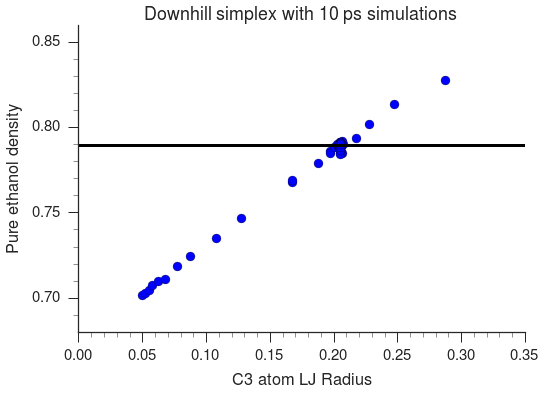

In [130]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(radii[:-1], densities, s=80)
ax.axhline(experimental_density, c='k', lw=3)
ax.set_title('Downhill simplex with 10 ps simulations')
ax.set_xlabel('C3 atom LJ Radius')
ax.set_ylabel('Pure ethanol density')
fetching_plot(fig)

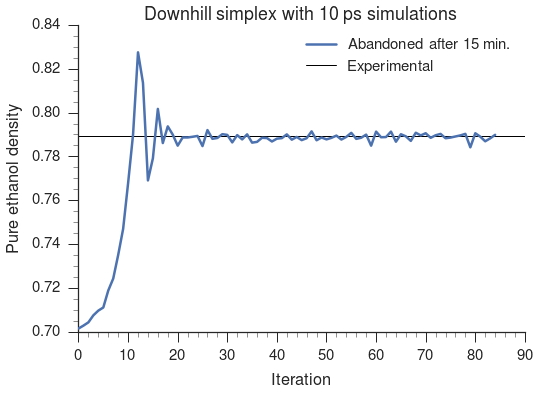

In [139]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(densities)), densities, zorder=10, label='Abandoned after 15 min.')
ax.axhline(experimental_density, c='k', lw=1, label='Experimental')
ax.set_title('Downhill simplex with 10 ps simulations')
ax.set_xlabel('Iteration')
ax.set_ylabel('Pure ethanol density')
ax.legend()
fetching_plot(fig)